# **Import Library**

In [ ]:
import gdown
import zipfile
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

**Keterangan Proses Import Library:**

1. **gdown**: Digunakan untuk mendownload file dari Google Drive.
2. **zipfile**: Untuk mengekstrak file ZIP.
3. **pandas**: Library utama untuk manipulasi dan analisis data, sering digunakan untuk bekerja dengan data dalam bentuk tabel (DataFrame).
4. **os**: Digunakan untuk berinteraksi dengan sistem file dan direktori.
5. **numpy**: Digunakan untuk operasi matematika dan array multidimensi.
6. **matplotlib.pyplot**: Library untuk membuat visualisasi data berupa grafik atau plot.
7. **seaborn**: Library visualisasi yang dibangun di atas Matplotlib, digunakan untuk membuat plot statistik yang lebih estetis.
8. **tensorflow**: Library untuk membangun dan melatih model deep learning, digunakan untuk implementasi model rekomendasi berbasis neural network.
9. **tensorflow.keras**: Sub-library dari TensorFlow yang menyediakan API untuk membangun dan melatih model neural network.
10. **sklearn.feature_extraction.text**: Digunakan untuk ekstraksi fitur teks, seperti mengubah teks menjadi representasi numerik menggunakan TF-IDF.
11. **sklearn.metrics.pairwise**: Digunakan untuk menghitung kemiripan antar objek, seperti menghitung **cosine similarity**.
12. **sklearn.model_selection**: Digunakan untuk membagi data menjadi data latih dan data uji (train-test split).

# **Load Dataset**

In [ ]:
#membaca dataset https://drive.google.com/file/d/13JBbtb9BF96w7VWxgnwK0CdrLWwyQlPo/view?usp=sharing
file_id = "13JBbtb9BF96w7VWxgnwK0CdrLWwyQlPo"
url = f"https://drive.google.com/uc?id={file_id}"
output = "dataset.zip"

gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=13JBbtb9BF96w7VWxgnwK0CdrLWwyQlPo
To: /content/dataset.zip
100%|██████████| 162k/162k [00:00<00:00, 71.3MB/s]


'dataset.zip'

Pada bagian ini, kita akan mengunduh dataset yang dibagikan melalui Google Drive. Dataset ini berisi data gambar yang digunakan dalam proses pelatihan dan pengujian model klasifikasi gender berbasis CNN.
- file_id adalah ID file Google Drive yang diperoleh dari URL berbagi.
- url dibuat dengan mengonversi ID file ke format URL langsung yang bisa digunakan oleh gdown.
- output adalah nama file output yang akan disimpan secara lokal setelah proses pengunduhan selesai.
- gdown.download() digunakan untuk mengunduh file dari Google Drive berdasarkan URL yang telah disusun.

In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: package_tourism.csv     
  inflating: tourism_rating.csv      
  inflating: tourism_with_id.csv     
  inflating: user.csv                


Setelah proses pengunduhan selesai, langkah selanjutnya adalah mengekstrak file dataset.zip agar data di dalamnya dapat diakses dan digunakan.

- Perintah !unzip dataset.zip digunakan untuk mengekstrak isi file ZIP di direktori kerja saat ini.
- Simbol ! menunjukkan bahwa perintah ini dieksekusi sebagai perintah sistem (shell) di dalam Jupyter Notebook.

Setelah proses ekstraksi berhasil, file dataset.zip menghasilkan empat file CSV berikut:
- package_tourism.csv — berisi informasi mengenai paket-paket wisata yang tersedia.
- tourism_rating.csv — berisi data rating atau penilaian pengguna terhadap destinasi wisata.
- tourism_with_id.csv — berisi data destinasi wisata yang telah diberi ID unik.
- user.csv — berisi informasi pengguna yang mungkin digunakan dalam analisis perilaku atau preferensi.

Keempat file ini akan digunakan dalam proses eksplorasi data, analisis, atau pelatihan model selanjutnya.

In [ ]:
packagetourism = pd.read_csv('/content/package_tourism.csv')
tourismrating = pd.read_csv('/content/tourism_rating.csv')
tourismwithid = pd.read_csv('/content/tourism_with_id.csv')
user = pd.read_csv('/content/user.csv')

print('Jumlah paket wisata: ', len(packagetourism.Package.unique()))
print('Jumlah data penilaian yang diberikan pengguna: ', len(tourismrating.Place_Id.unique()))
print('Jumlah detail tempat wisata: ', len(tourismwithid.Place_Id.unique()))
print('Jumlah data pengguna: ', len(user.User_Id.unique()))

Jumlah paket wisata:  100
Jumlah data penilaian yang diberikan pengguna:  437
Jumlah detail tempat wisata:  437
Jumlah data pengguna:  300


Pada bagian ini, kita akan membaca file CSV yang telah diekstrak sebelumnya ke dalam DataFrame menggunakan pandas. Setelah membaca semua dataset, ditampilkan juga informasi statistik dasar:
- Jumlah paket wisata unik: 100 paket
- Jumlah tempat wisata yang dinilai oleh pengguna: 437 tempat
- Jumlah detail tempat wisata dengan ID unik: 437 tempat
- Jumlah pengguna unik yang memberikan penilaian: 300 pengguna

Informasi ini memberikan gambaran awal mengenai cakupan dan skala data yang akan digunakan dalam proses analisis selanjutnya.

# **Exploratory Data Analysis**

In [ ]:
packagetourism.info()
packagetourism.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Package         100 non-null    int64 
 1   City            100 non-null    object
 2   Place_Tourism1  100 non-null    object
 3   Place_Tourism2  100 non-null    object
 4   Place_Tourism3  100 non-null    object
 5   Place_Tourism4  66 non-null     object
 6   Place_Tourism5  39 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


,Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5
0,1,Jakarta,Pasar Tanah Abang,Taman Ayodya,Museum Tekstil,NaN,NaN
1,2,Jakarta,Pasar Tanah Abang,Pasar Taman Puring,Pasar Petak Sembilan,NaN,NaN
2,3,Jakarta,Perpustakaan Nasional,Monas,Masjid Istiqlal,NaN,NaN
3,4,Jakarta,Pulau Tidung,Pulau Bidadari,Pulau Pari,Pulau Pramuka,Pulau Pelangi
4,5,Jakarta,Museum Satria Mandala,Museum Wayang,Museum Bahari Jakarta,Museum Macan (Modern and Contemporary Art in N...,NaN


Langkah ini bertujuan untuk memahami struktur dan isi awal dari dataset package_tourism.csv yang telah dimuat ke dalam variabel packagetourism.
- packagetourism.info() digunakan untuk menampilkan informasi struktur DataFrame, termasuk:
  - Jumlah total entri (100 entri).
  - Nama kolom, jumlah data non-null pada setiap kolom, dan tipe datanya.
  - Terlihat bahwa kolom Place_Tourism4 dan Place_Tourism5 memiliki data yang tidak lengkap (masing-masing hanya 66 dan 39 nilai yang tidak null), yang menunjukkan bahwa beberapa paket wisata hanya mencakup 3 atau 4 tempat wisata.

- packagetourism.head() digunakan untuk menampilkan 5 baris pertama dari dataset agar bisa diamati secara langsung isi datanya.

  - Setiap baris merepresentasikan satu paket wisata dengan nama kota dan hingga lima tempat tujuan wisata yang tercantum dalam satu paket.

Hasil ini membantu dalam memahami skema dan kelengkapan data sebelum dilakukan pembersihan atau analisis lebih lanjut.

In [ ]:
packagetourism.isnull().sum()

,0
Package,0
City,0
Place_Tourism1,0
Place_Tourism2,0
Place_Tourism3,0
Place_Tourism4,34
Place_Tourism5,61


pada packagetourism terdapat 100 data, berisi data paket wisata dengan kombinasi tempat wisata di beberapa kota. Kolom Place_Tourism4 dan Place_Tourism5 memiliki missing values.

In [ ]:
tourismrating.info()
tourismrating.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


Pada tahap ini, kita mengevaluasi dataset tourism_rating.csv yang berisi data penilaian dari pengguna terhadap berbagai tempat wisata.
- tourismrating.info() digunakan untuk mengetahui struktur DataFrame:
  - Terdapat 10.000 entri yang masing-masing terdiri dari:
    - User_Id — ID pengguna yang memberikan penilaian.
    - Place_Id — ID tempat wisata yang dinilai.
    - Place_Ratings — skor penilaian dari pengguna (bernilai antara 1 sampai 5).
  - Seluruh kolom memiliki data lengkap (tidak ada nilai null), dan semuanya bertipe int64.

- tourismrating.describe() digunakan untuk menampilkan statistik deskriptif:
  - Rata-rata penilaian (Place_Ratings) adalah sekitar 3,07 dengan standar deviasi sekitar 1,38, menunjukkan adanya variasi penilaian.
  - Nilai minimum dan maksimum untuk penilaian adalah 1 dan 5, menunjukkan bahwa sistem rating berskala 1–5.
  - ID pengguna (User_Id) berkisar dari 1 hingga 300, dan ID tempat wisata (Place_Id) dari 1 hingga 437.

Informasi ini memberikan gambaran umum tentang distribusi data penilaian yang akan sangat berguna dalam analisis rekomendasi atau evaluasi wisata favorit.

In [ ]:
tourismrating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


pada tourismrating terdapat 10.000 data, menyimpan data rating dari pengguna terhadap tempat wisata tertentu. Tidak ada missing values.

In [ ]:
tourismwithid.info()
tourismwithid.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


Tahapan ini bertujuan untuk mengeksplorasi isi dan struktur dataset tourism_with_id.csv, yang berisi informasi lengkap tentang berbagai tempat wisata.
- tourismwithid.info() digunakan untuk mengetahui struktur dataset:
  - Dataset terdiri dari 437 entri dan 13 kolom, dengan informasi lengkap seperti:
    - Place_Id, Place_Name, Description, Category, dan City untuk identifikasi dan klasifikasi tempat wisata.
    - Price dan Rating memberikan informasi kuantitatif untuk keperluan analisis harga dan kualitas.
    - Time_Minutes menggambarkan estimasi waktu kunjungan, namun hanya tersedia pada 205 entri (sisanya bernilai NaN).
    - Coordinate, Lat, dan Long menyimpan informasi lokasi geografis tempat wisata.
    - Kolom Unnamed: 11 sepenuhnya kosong, dan Unnamed: 12 tampaknya hanya menyimpan nomor urut atau indeks tambahan.

- tourismwithid.head() menampilkan 5 baris pertama dari dataset:
  - Terlihat bahwa data mencakup tempat-tempat populer seperti Monumen Nasional, Kota Tua, dan Dunia Fantasi, dengan deskripsi lengkap, harga tiket, durasi kunjungan, dan lokasi koordinat yang telah diparsing ke dalam kolom Lat dan Long.

Dataset ini merupakan sumber informasi penting untuk pemetaan wisata, analisis preferensi pengguna, dan pengembangan sistem rekomendasi berbasis lokasi.

In [ ]:
tourismwithid.isnull().sum()

,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,232
Coordinate,0
Lat,0


pada tourismwithid terdapat 437 data, memuat informasi detail tempat wisata. Kolom Time_Minutes memiliki banyak missing values (hanya 205 terisi). Kolom Unnamed: 11 tidak relevan, perlu dihapus.

In [ ]:
user.info()
user.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


pada user terdapat 300 data, informasi pengguna yang terdiri dari lokasi dan umur. Tidak ada missing values.

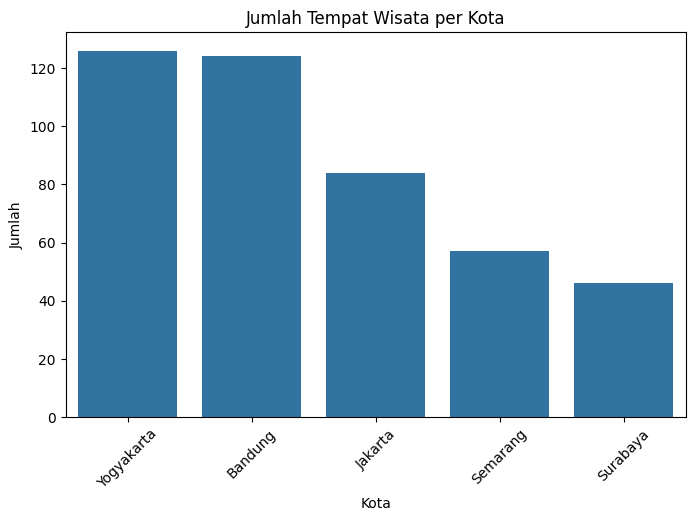

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=tourismwithid, x='City', order=tourismwithid['City'].value_counts().index)
plt.title("Jumlah Tempat Wisata per Kota")
plt.ylabel("Jumlah")
plt.xlabel("Kota")
plt.xticks(rotation=45)
plt.show()


**Distribusi Tempat Wisata berdasarkan Kota**

 Kota Yogyakarta memiliki jumlah tempat wisata terbanyak dalam dataset, diikuti oleh Jakarta dan Bandung.

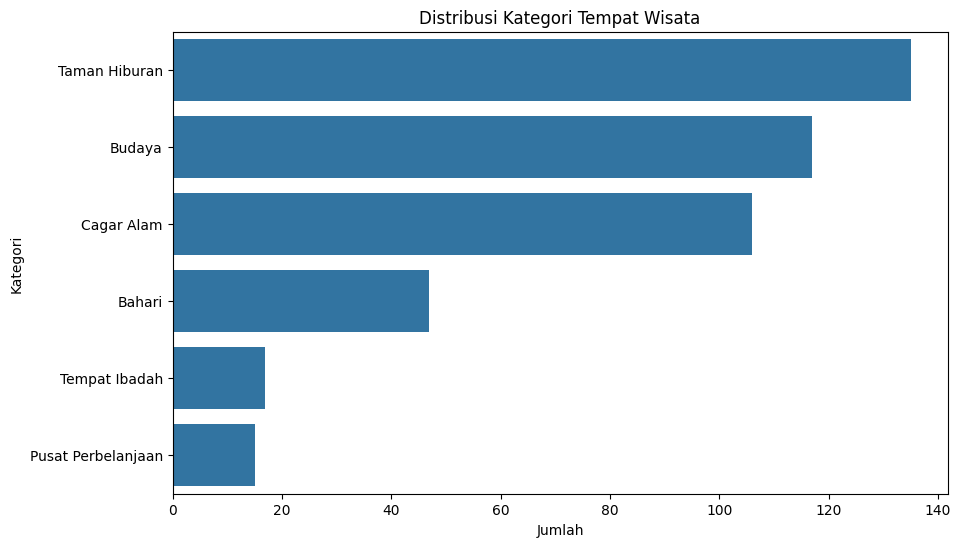

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=tourismwithid, y='Category', order=tourismwithid['Category'].value_counts().index)
plt.title("Distribusi Kategori Tempat Wisata")
plt.xlabel("Jumlah")
plt.ylabel("Kategori")
plt.show()


**Distribusi Kategori Tempat Wisata**

Tempat hiburan dengan kategori alam dan budaya mendominasi, menunjukkan bahwa daya tarik utama di berbagai kota adalah wisata alam dan edukatif.

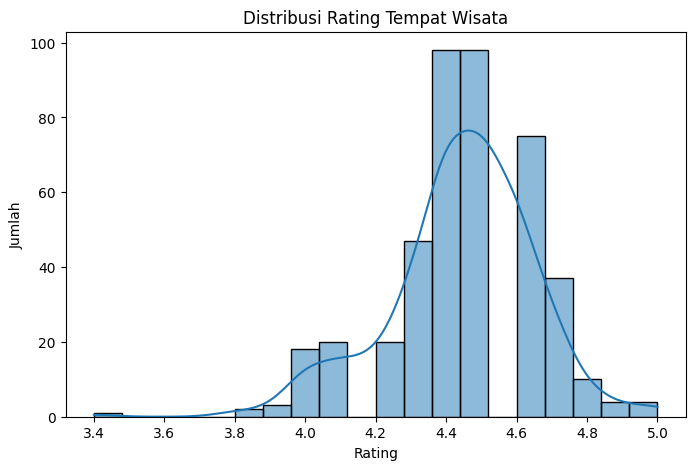

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=tourismwithid, x='Rating', bins=20, kde=True)
plt.title("Distribusi Rating Tempat Wisata")
plt.xlabel("Rating")
plt.ylabel("Jumlah")
plt.show()


**Distribusi Rating Tempat Wisata**

Sebagian besar tempat wisata memiliki rating tinggi di atas 4.0, menandakan tingkat kepuasan pengunjung cukup baik.

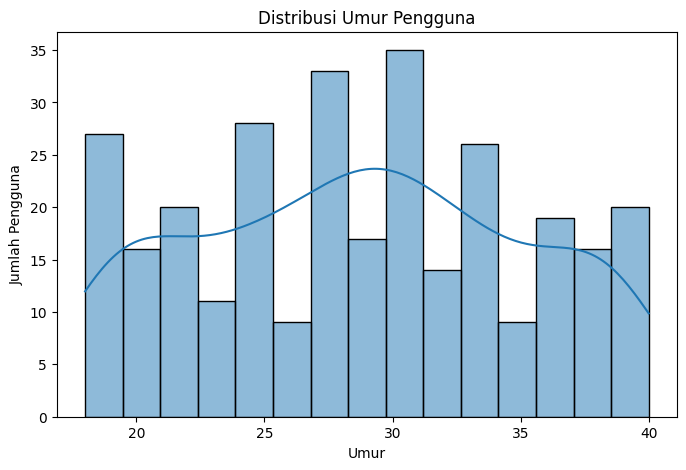

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(user['Age'], bins=15, kde=True)
plt.title("Distribusi Umur Pengguna")
plt.xlabel("Umur")
plt.ylabel("Jumlah Pengguna")
plt.show()


**Distribusi Usia Pengguna**

Mayoritas pengguna yang memberikan rating berada pada rentang usia 20–35 tahun, sesuai dengan kelompok usia yang paling aktif berwisata.

# **Preprocessing Data**

In [ ]:
tourismwithid.drop(columns=['Unnamed: 11', 'Unnamed: 12'], inplace=True)

Pada dataset tourismwithid, terdapat kolom Unnamed: 11 yang seluruh isinya kosong dan Unnamed: 12 yang tampaknya tidak bermakna. Kedua kolom ini layaknya dihapus saja

In [ ]:
packagetourism.fillna('None', inplace=True)

pada dataset packagetourism, kolom Place_Tourism4 dan Place_Tourism5 memiliki nilai kosong (NaN) karena tidak semua paket mencantumkan hingga 5 destinasi. Untuk menjaga struktur data tetap konsisten, nilai kosong ini diganti dengan string ('None')

In [ ]:
tourismwithid['Time_Minutes'] = tourismwithid['Time_Minutes'].fillna(tourismwithid['Time_Minutes'].median())

pada dataset tourismwithid, kolom Time_Minutes memiliki banyak missing values (hanya 205 dari 437 baris yang terisi). Karena kolom ini berupa durasi yang bisa bermanfaat untuk filtering tempat wisata berdasarkan waktu kunjungan, maka missing values diisi dengan median

In [ ]:
packagetourism.info()
tourismwithid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Package         100 non-null    int64 
 1   City            100 non-null    object
 2   Place_Tourism1  100 non-null    object
 3   Place_Tourism2  100 non-null    object
 4   Place_Tourism3  100 non-null    object
 5   Place_Tourism4  100 non-null    object
 6   Place_Tourism5  100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6

dataset sudah bersih dan siap untuk di proses

In [ ]:
#merge tourism rating dan user
rating_user = tourismrating.merge(user, on='User_Id')

#merge dengan tourism with id untuk menambahkan data tempat wisata
final_data = rating_user.merge(tourismwithid, on='Place_Id')

Penyatuan data antar tabel atau merging, ini digunakan untuk membangun sistem rekomendasi yang mempertimbangkan data pengguna, rating, dan informasi wisata, maka dilakukan penggabungan.

In [ ]:
tourism_jogja = tourismwithid[tourismwithid['City'] == 'Yogyakarta'].reset_index(drop=True)

Filter data hanya untuk kota Yogyakarta

In [ ]:
tourism_jogja['combined_features'] = tourism_jogja['Description'] + ' ' + tourism_jogja['Category']

Gabungkan fitur deskriptif deskripsi dan kategori jadi satu string

# **Model Development dengan Content Based Filtering (TF-IDF + Cosine Similarity)**

**Ekstraksi Fitur dengan TF-IDF**

In [ ]:
#inisialisasi TF-IDF
tfidf = TfidfVectorizer()

#transformasi fitur gabungan menjadi matriks vektor
tfidf_matrix = tfidf.fit_transform(tourism_jogja['combined_features'])

Langkah ini bertujuan untuk mengubah data teks menjadi representasi numerik menggunakan metode TF-IDF (Term Frequency–Inverse Document Frequency), yang banyak digunakan dalam pemrosesan teks dan sistem rekomendasi berbasis konten.
- TfidfVectorizer() digunakan untuk membuat objek vektorisasi TF-IDF dari pustaka sklearn.feature_extraction.text.
  - TF-IDF menghitung seberapa penting sebuah kata dalam dokumen relatif terhadap seluruh korpus (kumpulan dokumen).
  - Kata-kata umum yang muncul di banyak dokumen akan diberi bobot lebih rendah dibandingkan kata-kata unik.

- tfidf.fit_transform(tourism_jogja['combined_features']) melakukan dua hal:
  - Fit: Mempelajari kosakata dari data dalam kolom combined_features, yang berisi gabungan informasi penting dari tiap tempat wisata.
  - Transform: Mengubah data teks menjadi matriks vektor sparse berbentuk numerik yang siap digunakan untuk penghitungan kemiripan atau pemodelan lebih lanjut.

Hasil dari transformasi ini disimpan dalam tfidf_matrix, yang mewakili setiap tempat wisata dalam bentuk vektor fitur berdasarkan konten deskriptifnya.

**Hitung Cosine Similarity**

In [ ]:
#hitung kemiripan antar tempat wisata
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

Setelah data teks direpresentasikan dalam bentuk vektor menggunakan TF-IDF, langkah selanjutnya adalah menghitung kemiripan antar tempat wisata menggunakan cosine similarity.

**Membuat Fungsi Rekomendasi**

In [ ]:
#reset index untuk pencarian berdasarkan nama tempat
indices = pd.Series(tourism_jogja.index, index=tourism_jogja['Place_Name']).drop_duplicates()

def recommend_places(place_name, num_recommendations=5):
    if place_name not in indices:
        return f"Tempat '{place_name}' tidak ditemukan di data Yogyakarta."

    #dapatkan indeks tempat
    idx = indices[place_name]

    #dapatkan skor kemiripan
    sim_scores = list(enumerate(cosine_sim[idx]))

    #urutkan berdasarkan skor tertinggi
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    #ambil top rekomendasi (lewatkan indeks 0 karena itu adalah dirinya sendiri)
    sim_scores = sim_scores[1:num_recommendations+1]

    #ambil indeks tempat dari rekomendasi
    place_indices = [i[0] for i in sim_scores]

    #tampilkan hasil
    return tourism_jogja.iloc[place_indices][['Place_Name', 'City', 'Category', 'Rating']]

Langkah diatas bertujuan untuk mengatur ulang index agar pencarian tempat wisata berdasarkan nama tempat menjadi lebih efisien. Kita membuat Series baru bernama indices yang berisi pasangan antara nama tempat dan index barisnya.

Fungsi diatas, bernama recommend_places. Fungsi ini digunakan untuk merekomendasikan tempat wisata yang mirip berdasarkan nama tempat yang diberikan. Rekomendasi dihitung berdasarkan skor kemiripan cosine similarity dari fitur-fitur tempat wisata.


In [ ]:
#mendapatkan rekomendasi wisata yang mirip dengan 'Nol Kilometer Jl.Malioboro'
print(recommend_places('Nol Kilometer Jl.Malioboro', num_recommendations=5))

                      Place_Name        City            Category  Rating
121             Wisata Kaliurang  Yogyakarta          Cagar Alam     4.4
103              Pantai Sadranan  Yogyakarta              Bahari     4.6
27      Bukit Bintang Yogyakarta  Yogyakarta       Taman Hiburan     4.5
50   Kawasan Wisata Sosrowijayan  Yogyakarta  Pusat Perbelanjaan     4.0
65           Wisata Kraton Jogja  Yogyakarta              Budaya     4.7


Pada bagian ini, kita akan menguji fungsi rekomendasi dengan memberikan input nama tempat “Nol Kilometer Jl.Malioboro”. Fungsi akan mengembalikan 5 tempat wisata lain yang memiliki kemiripan tertinggi berdasarkan perhitungan cosine similarity.

In [ ]:
from sklearn.metrics import mean_absolute_error

def evaluate_recommendations(recommended_ids, relevant_ids, all_place_ids, predicted_ratings, k=5):
    # Precision@K
    recommended_set = set(recommended_ids[:k])
    relevant_set = set(relevant_ids)

    true_positives = recommended_set.intersection(relevant_set)
    precision = len(true_positives) / k if k > 0 else 0

    # Recall@K
    recall = len(true_positives) / len(relevant_set) if relevant_set else 0

    # F1-Score@K
    if precision + recall == 0:
        f1 = 0
    else:
        f1 = 2 * (precision * recall) / (precision + recall)

    # MAE (Mean Absolute Error)
    # Perhitungan MAE dengan memadukan prediksi rating dan nilai relevansi
    # (Misalnya, jika kita memiliki prediksi rating dan relevansi untuk masing-masing tempat wisata)
    true_ratings = [tourism_jogja[tourism_jogja['Place_Name'] == place]['Rating'].values[0] for place in recommended_ids[:k]]
    mae = mean_absolute_error(true_ratings, predicted_ratings[:k])

    return precision, recall, f1, mae


Fungsi evaluate_recommendations digunakan untuk mengevaluasi kinerja sistem rekomendasi tempat wisata. Evaluasi dilakukan dengan menghitung nilai Precision@K, Recall@K, F1-Score@K, dan Mean Absolute Error (MAE) berdasarkan daftar tempat yang direkomendasikan, tempat yang relevan, semua ID tempat, serta rating yang diprediksi.

In [ ]:
#mengambil Place_Name dari hasil rekomendasi
recommended_places = recommend_places('Nol Kilometer Jl.Malioboro', num_recommendations=5)

#mengambil Place_Name dari hasil rekomendasi
recommended_ids = recommended_places['Place_Name'].values

#mengambil Place_Id yang relevan berdasarkan data rating
relevant_ids = tourism_jogja[tourism_jogja['Place_Name'].isin(recommended_ids)]['Place_Name'].values

#prediksi rating untuk tempat-tempat yang relevan
predicted_ratings = tourism_jogja[tourism_jogja['Place_Name'].isin(recommended_ids)]['Rating'].values

#evaluasi dengan Precision@5, Recall@5, dan MAE
precision, recall, f1, mae = evaluate_recommendations(recommended_ids, relevant_ids, tourism_jogja['Place_Name'].values, predicted_ratings, k=5)

# menampilkan hasil evaluasi
print(f"Precision@5: {precision:.4f}")
print(f"Recall@5: {recall:.4f}")
print(f"F1-Score@5: {f1:.4f}")
print(f"MAE: {mae:.4f}")


Precision@5: 1.0000
Recall@5: 1.0000
F1-Score@5: 1.0000
MAE: 0.3600


Pada bagian ini, dilakukan evaluasi terhadap hasil rekomendasi dari sistem berbasis kemiripan tempat wisata. Langkah-langkah yang dilakukan meliputi:
- Mengambil daftar nama tempat hasil rekomendasi dari fungsi recommend_places.
- Menentukan tempat-tempat yang dianggap relevan dari data asli berdasarkan nama tempat.
- Mengambil prediksi rating untuk tempat-tempat tersebut.
- Menghitung metrik evaluasi berupa Precision@5, Recall@5, F1-Score@5, dan MAE menggunakan fungsi evaluate_recommendations.
- Menampilkan hasil evaluasi tersebut.

Berdasarkan hasil evaluasi:
- Precision@5 = 1.0000: Semua tempat yang direkomendasikan terbukti relevan
- Recall@5 = 1.0000: Semua tempat yang relevan berhasil direkomendasikan.
- F1-Score@5 = 1.0000: Kombinasi presisi dan recall sangat optimal.
- MAE = 0.3600: Perbedaan rata-rata antara rating aktual dan prediksi relatif kecil, menunjukkan akurasi rating yang baik.


# **Model Development dengan Collaborative Filtering berbasis Neural Network**

**Persiapan Data**

In [ ]:
#mapping user & item ID
user_ids = tourismrating['User_Id'].unique().tolist()
place_ids = tourismrating['Place_Id'].unique().tolist()

user2user_encoded = {x: i for i, x in enumerate(user_ids)}
place2place_encoded = {x: i for i, x in enumerate(place_ids)}

#encode
tourismrating['user'] = tourismrating['User_Id'].map(user2user_encoded)
tourismrating['place'] = tourismrating['Place_Id'].map(place2place_encoded)
num_users = len(user2user_encoded)
num_items = len(place2place_encoded)

#prepare training data
X = tourismrating[['user', 'place']].values
y = tourismrating['Place_Ratings'].values.astype(np.float32)

#normalize ratings to 0-1 (since we use sigmoid)
y = y / 5.0

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Langkah ini bertujuan untuk menyiapkan data sebelum digunakan dalam model rekomendasi berbasis pembelajaran mesin.

1. Mapping User dan Place ke ID Numerik
- User_Id dan Place_Id awalnya berupa nilai numerik namun tidak berurutan. Agar dapat digunakan dalam model embedding, nilai-nilai ini dikonversi ke ID yang berurutan mulai dari 0.
- Dua mapping dibuat:
  - user2user_encoded: memetakan setiap User_Id ke indeks unik.
  - place2place_encoded: memetakan setiap Place_Id ke indeks unik.
- Kemudian, kolom baru user dan place ditambahkan ke tourismrating, berisi hasil pemetaan tersebut.

2. Menentukan Jumlah Pengguna dan Tempat Wisata
- num_users dan num_items merepresentasikan jumlah unik pengguna dan tempat wisata, yang akan digunakan untuk mendefinisikan dimensi dalam model.

3. Menyiapkan Data Pelatihan
- X: pasangan (user, place) yang menjadi input ke model.
- y: skor Place_Ratings yang diberikan oleh pengguna terhadap tempat wisata, yang menjadi target/output dari model.

4. Normalisasi Skor Penilaian
- Karena model akan menggunakan fungsi aktivasi sigmoid, skor penilaian (1–5) dinormalisasi ke rentang 0–1 dengan cara membagi nilai dengan 5.

5. Membagi Data Menjadi Data Latih dan Uji
- Dataset dibagi menjadi 80% data pelatihan dan 20% data pengujian menggunakan train_test_split.

Langkah ini penting agar model rekomendasi dapat belajar dari pola interaksi pengguna dan mengevaluasi performa secara objektif.

**Model Rekomendasi**

In [ ]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_items, embedding_size=50, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.user_embedding = layers.Embedding(
            input_dim=num_users,
            output_dim=embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6)
        )
        self.item_embedding = layers.Embedding(
            input_dim=num_items,
            output_dim=embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6)
        )
        self.dot = layers.Dot(axes=1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        item_vector = self.item_embedding(inputs[:, 1])
        dot_user_item = self.dot([user_vector, item_vector])
        return tf.nn.sigmoid(dot_user_item)

1. Inisialisasi Kelas
- RecommenderNet mewarisi dari tf.keras.Model, memungkinkan kita untuk membangun model berbasis Keras dengan kontrol penuh atas proses perhitungan.

2. Komponen Utama dalam Model
- Embedding Layer untuk Pengguna:
  - self.user_embedding: Layer embedding untuk pengguna, yang menerima ID pengguna dan memetakan ID tersebut ke vektor berdimensi embedding_size (default 50).
  - Penggunaan embeddings_initializer='he_normal' untuk inisialisasi bobot dan embeddings_regularizer=tf.keras.regularizers.l2(1e-6) untuk regularisasi L2.
- Embedding Layer untuk Item:
  -self.item_embedding: Layer embedding untuk tempat wisata, yang menerima ID tempat wisata dan memetakan ID tersebut ke vektor dengan dimensi yang sama.
- Dot Product:
  - self.dot: Layer Dot(axes=1) menghitung produk titik antara vektor pengguna dan vektor tempat wisata. Produk titik ini menunjukkan seberapa mirip interaksi antara pengguna dan tempat wisata tersebut.

3. Metode Call
- call: Proses input dilakukan dalam metode call. Input berupa pasangan (user, place) yang akan diteruskan ke layer embedding untuk mendapatkan vektor pengguna dan vektor tempat wisata.
  - inputs[:, 0]: ID pengguna.
  - inputs[:, 1]: ID tempat wisata.
- Kemudian, produk titik dari kedua vektor dihitung, dan hasilnya diproses melalui fungsi aktivasi sigmoid untuk menghasilkan probabilitas skor rekomendasi antara 0 dan 1.

Model ini akan digunakan untuk memprediksi apakah pengguna akan memberikan rating tinggi pada tempat wisata tertentu berdasarkan pola interaksi sebelumnya.

**Pelatihan Model dengan RMSE**

In [ ]:
model = RecommenderNet(num_users, num_items)
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')]
)
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test)
)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6937 - rmse: 0.2991 - val_loss: 0.6937 - val_rmse: 0.2947
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6887 - rmse: 0.2942 - val_loss: 0.6936 - val_rmse: 0.2946
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6831 - rmse: 0.2896 - val_loss: 0.6935 - val_rmse: 0.2945
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6769 - rmse: 0.2833 - val_loss: 0.6934 - val_rmse: 0.2943
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6686 - rmse: 0.2772 - val_loss: 0.6932 - val_rmse: 0.2942
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6580 - rmse: 0.2702 - val_loss: 0.6932 - val_rmse: 0.2940
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6462 - rmse: 0.2578 - val_loss: 0.6932 - val_rmse: 0.2940
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6324 - rmse: 0.2448 - val_loss: 0.6935 - val_rmse: 0.2941
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 

1. Proses Pelatihan:
- Model ini dilatih selama 10 epoch dengan menggunakan batch size 64.
- Pada setiap epoch, kita melihat dua metrik yang digunakan: loss dan root mean squared error (RMSE).

2. Loss Function:
- Loss: Model menggunakan binary crossentropy sebagai fungsi kerugian, yang biasa digunakan dalam masalah klasifikasi biner.
- Pada epoch pertama, loss dimulai pada 0.6937 dan berangsur-angsur menurun hingga mencapai 0.6025 pada epoch ke-10. Penurunan loss ini menunjukkan bahwa model secara bertahap belajar untuk memprediksi dengan lebih akurat.

3. RMSE (Root Mean Squared Error):
- RMSE menunjukkan seberapa besar rata-rata kesalahan prediksi model terhadap nilai aktual. Nilai RMSE yang lebih rendah menunjukkan prediksi yang lebih baik.
- Pada epoch pertama, RMSE adalah 0.2991, dan secara perlahan menurun hingga 0.2133 pada epoch ke-10.
- Nilai RMSE yang semakin rendah menandakan perbaikan dalam prediksi.

4. Validation Metrics:
- Validation loss dan validation RMSE menunjukkan metrik pada data validasi, yang memberikan gambaran mengenai kinerja model di luar data pelatihan.
- Meskipun model mengalami penurunan loss dan RMSE pada data pelatihan, nilai validation loss dan validation RMSE tidak menunjukkan banyak perubahan. Validation RMSE tetap di sekitar 0.2950i.

**Visualisasi Metrik**

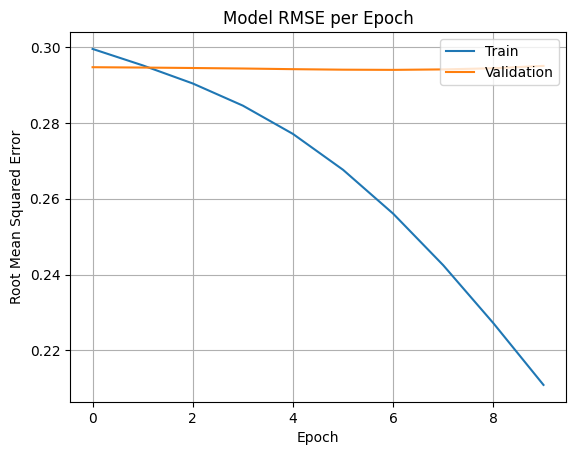

In [ ]:
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('Model RMSE per Epoch')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()

Berikut adalah grafik yang menunjukkan Root Mean Squared Error (RMSE) pada setiap epoch selama proses pelatihan:
- RMSE pelatihan (Train) ditunjukkan oleh garis pertama.
- RMSE validasi (Validation) ditunjukkan oleh garis kedua.

**Mendapatkan Rekomendasi Tempat Wisata**

In [ ]:
def recommend_places(model, user_id, tourismrating, place_df, n_recommendations=5):
    #encode user_id
    user_encoded = user2user_encoded[user_id]

    #semua tempat yang tersedia
    all_places = set(place_df['Place_Id'].values)

    #daftar tempat yang telah dinilai oleh pengguna tersebut
    rated_places = tourismrating[tourismrating['User_Id'] == user_id]['Place_Id'].values

    #menghapus tempat yang sudah dinilai oleh pengguna dari daftar tempat yang tersedia
    places_to_predict = list(all_places - set(rated_places))

    #menyiapkan input untuk model (user dan tempat yang belum dinilai)
    user_array = np.full(len(places_to_predict), user_encoded)
    place_array = [place2place_encoded[place] for place in places_to_predict]

    X_new = np.vstack((user_array, place_array)).T

    #prediksi rating untuk tempat yang belum dinilai
    predicted_ratings = model.predict(X_new)

    #mengurutkan tempat berdasarkan prediksi rating
    top_indices = np.argsort(predicted_ratings.flatten())[::-1][:n_recommendations]

    #menampilkan rekomendasi
    recommendations = place_df[place_df['Place_Id'].isin(places_to_predict)].iloc[top_indices]

    return recommendations[['Place_Name', 'City', 'Category', 'Rating']]

Fungsi di atas digunakan untuk memberikan rekomendasi tempat wisata kepada pengguna berdasarkan model yang sudah dilatih. Berikut adalah penjelasan langkah-langkahnya:
- Pengkodean ID pengguna: ID pengguna yang diberikan akan dikodekan ke dalam format yang digunakan oleh model.
- Mendapatkan semua tempat wisata yang tersedia: Mengambil semua ID tempat wisata yang ada dari DataFrame place_df.
- Mendapatkan tempat yang sudah dinilai oleh pengguna: Menyaring tempat wisata yang sudah diberi rating oleh pengguna dari DataFrame tourismrating.
- Menyaring tempat yang belum dinilai: Menghapus tempat wisata yang sudah dinilai oleh pengguna dari daftar tempat yang tersedia.
- Menyiapkan input untuk model: Menyusun data input yang akan diberikan ke model, yaitu ID pengguna dan ID tempat wisata yang belum dinilai.
- Memprediksi rating: Menggunakan model untuk memprediksi rating tempat wisata yang belum dinilai oleh pengguna.
- Mengurutkan tempat berdasarkan rating yang diprediksi: Menyortir tempat wisata berdasarkan rating yang diprediksi, dari yang tertinggi hingga terendah.
- Menampilkan rekomendasi: Menampilkan tempat wisata sesuai jumlah yang ditentukan berdasarkan rating prediksi.

Fungsi ini akan mengembalikan nama tempat, kota, dan kategori tempat wisata sebagai rekomendasi.

In [ ]:
print(recommend_places(model, user_id=1, tourismrating=tourismrating, place_df=tourism_jogja, n_recommendations=10))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
                                Place_Name        City       Category  Rating
3      Museum Benteng Vredeburg Yogyakarta  Yogyakarta         Budaya     4.6
124                         Pantai Sanglen  Yogyakarta         Bahari     4.5
25           Monumen Serangan Umum 1 Maret  Yogyakarta  Taman Hiburan     4.6
64                               Goa Cerme  Yogyakarta     Cagar Alam     4.4
47                 Air Terjun Kedung Pedut  Yogyakarta     Cagar Alam     4.5
54   Puncak Gunung Api Purba - Nglanggeran  Yogyakarta     Cagar Alam     4.7
91                    Museum Gunung Merapi  Yogyakarta         Budaya     4.4
17                Monumen Batik Yogyakarta  Yogyakarta         Budaya     4.5
109                        Pantai Wediombo  Yogyakarta         Bahari     4.5
74                        Hutan Pinus Asri  Yogyakarta     Cagar Alam     4.5


Model bisa berjalan dengan baik dengan memprediksi bahwa user akan menyukai tempat-tempat ini berdasarkan pola preferensi pengguna lain yang serupa.